### Housing Prediction Model Analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, r2_score

### Data Loading/ Preprocessing

1. load the housing data

In [2]:
df = pd.read_csv('housing.csv', na_values = '?')

2. Shape of the data

In [3]:
df.shape

(20640, 10)

3. i) Missing values in the dataframe

In [4]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

3) ii) Dropped the missing values

In [5]:
df = df.dropna()
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,INLAND
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,INLAND
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,INLAND
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,INLAND


In [6]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

4) i) created another dataframe by dropping mentioned columns.

In [7]:
corr_df = df.iloc[:,2:9].copy()

In [8]:
corr_df

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,41,880,129.0,322,126,8.3252,452600
1,21,7099,1106.0,2401,1138,8.3014,358500
2,52,1467,190.0,496,177,7.2574,352100
3,52,1274,235.0,558,219,5.6431,341300
4,52,1627,280.0,565,259,3.8462,342200
...,...,...,...,...,...,...,...
20635,25,1665,374.0,845,330,1.5603,78100
20636,18,697,150.0,356,114,2.5568,77100
20637,17,2254,485.0,1007,433,1.7000,92300
20638,18,1860,409.0,741,349,1.8672,84700


4) ii) Pearson correlation to find each of the correlation with target variable

In [9]:
corr_df.corrwith(corr_df['median_house_value'], axis=0)

housing_median_age    0.106432
total_rooms           0.133294
total_bedrooms        0.049686
population           -0.025300
households            0.064894
median_income         0.688355
median_house_value    1.000000
dtype: float64

### Data Visualisation

1) histogram visualising technique for visualising variation in corr_df columns. 

In [10]:
X = pd.DataFrame(df.drop('median_house_value', axis=1))
y = df['median_house_value']
print(X.shape, y.shape)

(20433, 9) (20433,)


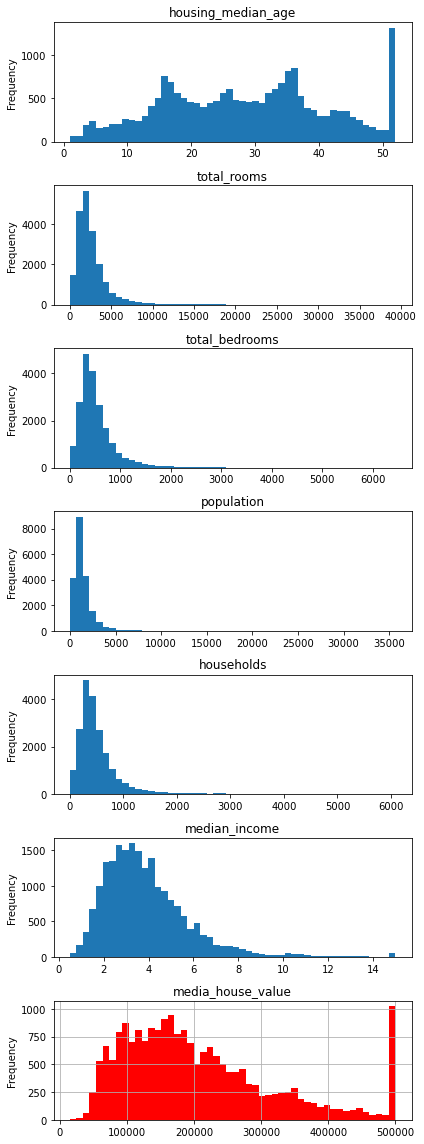

In [11]:
fig, axes = plt.subplots(7, 1, figsize=(6,16))
for axis, col in enumerate(corr_df.columns.tolist()):
    corr_df[col].plot.hist(ax=axes[axis],bins=50, title=col)

median_house_value = corr_df.median_house_value.hist(ax=axes[6],bins=50, color='r').set_title('media_house_value')
fig.tight_layout()

2). Used describe method to find mean, median and standard deviation for each column.

In [12]:
X.describe().loc[['mean', '50%', 'std']]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291


3). Used dummy/one-hot encoding for converting categorical variables

In [13]:
X = pd.get_dummies(X, columns = ['ocean_proximity'])

In [14]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,0,0,0,1,0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,0,0,0,1,0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,0,0,0,1,0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,0,0,0,1,0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,0,1,0,0,0
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,0,1,0,0,0
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,0,1,0,0,0
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,0,1,0,0,0


### Data Splitting

splitted data into (70:30) train:test ratio with variable X_train, X_test, y_train, y_test

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Data Scaling

1). Used two separate Standard scaler for target and feature dataset because target variable is continuous.

2). Applied fit_transform for training dataset. 

3). Applied transform for testing dataset.

In [16]:
sc_feature = StandardScaler()
sc_target = StandardScaler()

In [17]:
X_train = sc_feature.fit_transform(X_train.values)
y_train = sc_target.fit_transform(y_train.values[:,None])

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(14303, 13) (14303, 1) (6130, 13) (6130,)


In [18]:
X_test = sc_feature.transform(X_test.values)
y_test = sc_target.transform(y_test.values[:,None])

4). Performed visulisation on the scaled dataset (histogram technique)

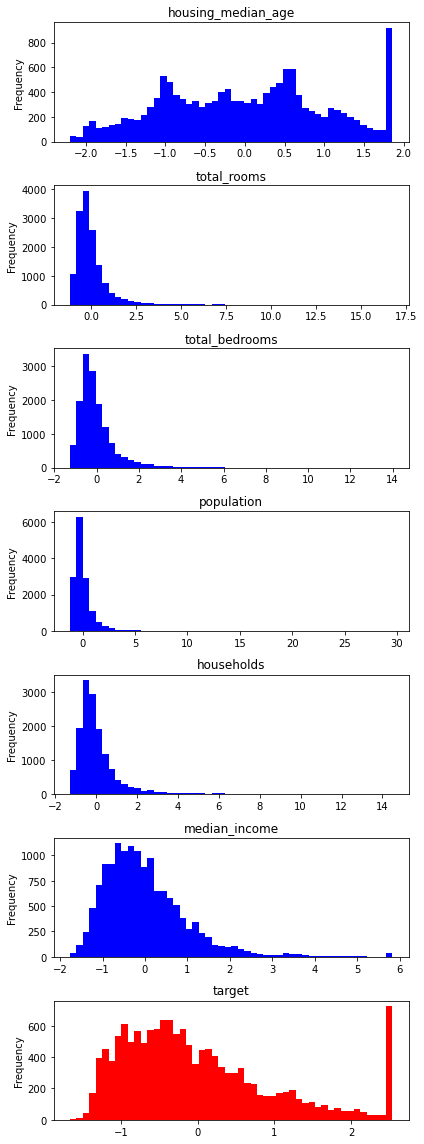

In [19]:
sc_train = pd.DataFrame(X_train[:,2:8],columns=['housing_median_age','total_rooms','total_bedrooms','population','households','median_income'])
sc_train['target'] = y_train.ravel()

fig, axes = plt.subplots(sc_train.shape[1], 1, figsize=(6,16))
for key, col in enumerate(sc_train.columns.tolist()):
    if col == 'target':
        c = 'r'
    else:
        c = 'b'
    sc_train[col].plot.hist(ax=axes[key],bins=50,title=col,color=c)
fig.tight_layout()

### Modelling

1). Instantiated the linear regression model.

In [20]:
model = LinearRegression()

2). Model fit() for scaled training dataset.

In [21]:
model.fit(X_train,y_train)

LinearRegression()

3). predicted values for X_test dataset

In [22]:
y_preds = model.predict(X_test)

4). inverse_transformed the predicted and tested values 

In [23]:
y_preds_raw = sc_target.inverse_transform(y_preds)
y_test_raw = sc_target.inverse_transform(y_test)
print(y_preds.shape, y_test.shape)

(6130, 1) (6130, 1)


5). Performed PCA on the features by setting set_components = 2 

i) Scatter plot to plot PCA 1 and 2 components on x and y axis

In [24]:
pca_X = PCA(n_components = 2)#instantiated pca
X_feat = pca_X.fit_transform(X_train)
X_feat.shape

(14303, 2)

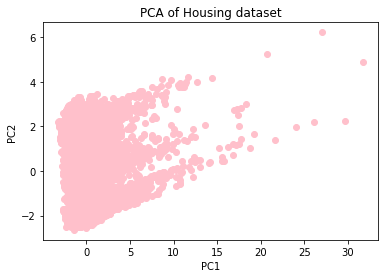

In [25]:
lw = 2
plt.scatter(X_feat[:,0], X_feat[:,1], color='pink')
plt.title("PCA of Housing dataset")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(False)

ii). calculated total variance ratio and pca singular values 

In [26]:
print('Total percentage of variance captured by 2 PCA components:{}'.format(np.sum(pca_X.explained_variance_ratio_)))
print('Strength of each of the two components:{}'.format(pca_X.singular_values_))

Total percentage of variance captured by 2 PCA components:0.4988482697134481
Strength of each of the two components:[236.58106375 191.79350536]


### Evaluation 

1). scatter plot the predicted median house values 

Text(0, 0.5, 'Predicted values')

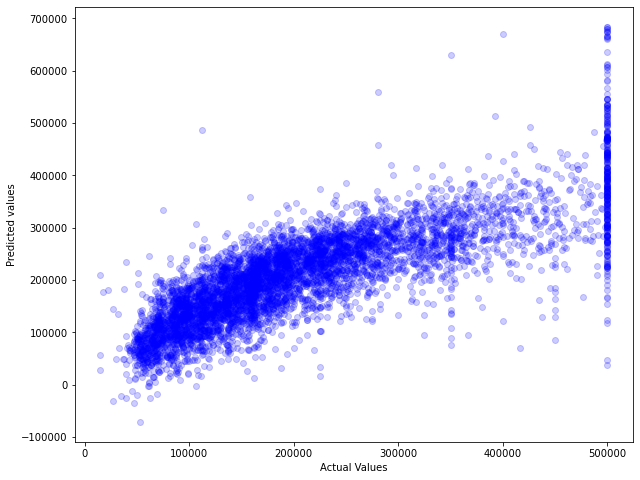

In [27]:
fig, axes = plt.subplots(1,1,figsize=(10,8))
axes.scatter(y_test_raw, y_preds_raw,c='b',alpha=0.2)
axes.set_xlabel("Actual Values", fontsize=10)
axes.set_ylabel("Predicted values", fontsize=10)

2). Calculated MAPE, RMSE and R^2 score for the model

In [28]:
mape =np.mean(np.abs((y_preds_raw - y_test_raw)/y_test_raw))
r2score = r2_score(y_test_raw.ravel(), y_preds_raw.ravel())
rmse = mean_squared_error(y_test_raw.ravel(), y_preds_raw.ravel(),squared=False)

In [29]:
print("MAPE: {}\nR2_Score: {}\nRMSE: {}".format(mape,r2score,rmse))

MAPE: 0.2950682526913868
R2_Score: 0.6440123743473924
RMSE: 68926.61295720792


In [31]:
model.coef_

array([[-0.4866592 , -0.49319925,  0.1155213 , -0.11926449,  0.38769988,
        -0.3540238 ,  0.12465905,  0.64939627,  0.04853315, -0.10226612,
         0.02657412,  0.02195713,  0.04797102]])